In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("vgsales.csv", encoding="windows-1252")

In [13]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [55]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [93]:
df.shape

(16598, 11)

In [126]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [127]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [30]:
genre=df.Genre.value_counts()
genre

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

In [128]:
df.select_dtypes(include="object")

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo
...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,Platform,Kemco
16594,Men in Black II: Alien Escape,GC,Shooter,Infogrames
16595,SCORE International Baja 1000: The Official Game,PS2,Racing,Activision
16596,Know How 2,DS,Puzzle,7G//AMES


In [129]:
df.select_dtypes(include="object").describe()

,Name,Platform,Genre,Publisher
count,16598,16598,16598,16540
unique,11493,31,12,578
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2163,3316,1351


In [130]:
df.Name.value_counts()

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
FIFA 14                                     9
Ratatouille                                 9
                                           ..
Aquapazza: Aquaplus Dream Match             1
Trauma Team                                 1
Mario Power Tennis                          1
Tales of the World: Radiant Mythology 3     1
Yes! PreCure 5                              1
Name: Name, Length: 11493, dtype: int64

In [131]:
df[df.Name=='Need for Speed: Most Wanted']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


In [132]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


In [135]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [137]:
low=df.Global_Sales.quantile(0.25)
low

0.06

In [138]:
high=df.Global_Sales.quantile(0.75)
high

0.47

In [140]:
IQR=high-low
IQR

0.41

In [141]:
lower_lim=low-1.5*IQR
lower_lim

-0.5549999999999999

In [142]:
upper_lim=high+1.5*IQR
upper_lim

1.085

In [145]:
df[df["Global_Sales"]>= 10]["Global_Sales"].value_counts()

14.64    2
10.42    1
11.66    1
12.14    1
16.15    1
        ..
11.98    1
22.00    1
20.81    1
33.00    1
11.33    1
Name: Global_Sales, Length: 61, dtype: int64

IndexError: index 2 is out of bounds for axis 0 with size 2

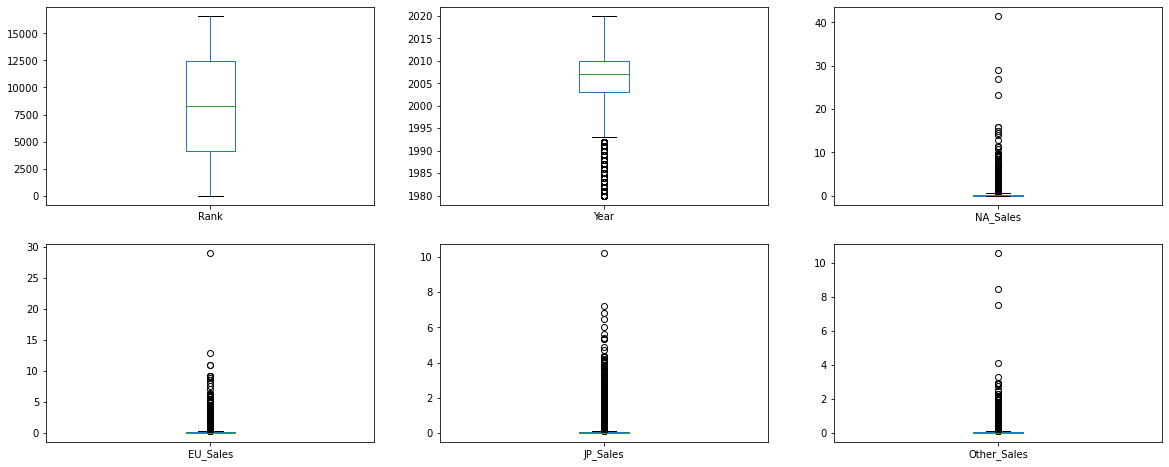

In [149]:
fig, ax= plt.subplots(2,3, figsize=(20,8))
x=0
y=0
for column in df.select_dtypes('number').columns:
    df[column].plot(kind='box', ax=ax[x,y])
    if y < 2:
        y += 1
    else:
        x+= 1
        y=0


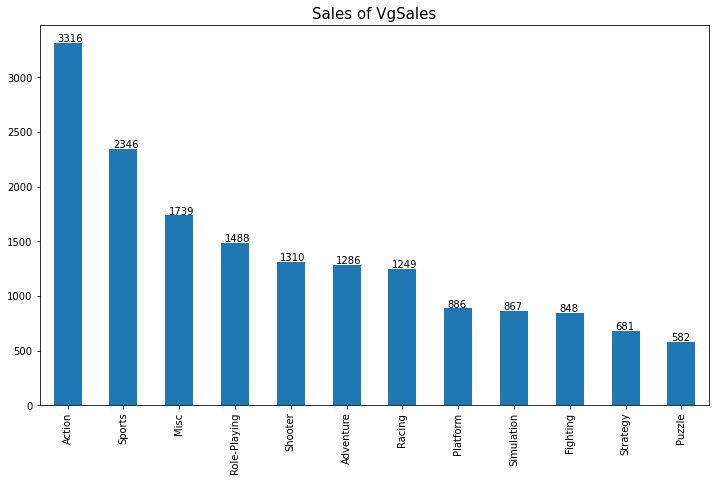

In [35]:
#with pandas
fig, ax = plt.subplots(figsize=(12,7))
df.Genre.value_counts().plot(kind='bar', ax=ax)
ax.set_title("Sales of VgSales", fontsize=15)
ax.set_xticklabels(genre.index, rotation=90)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.06, p.get_height()+10));

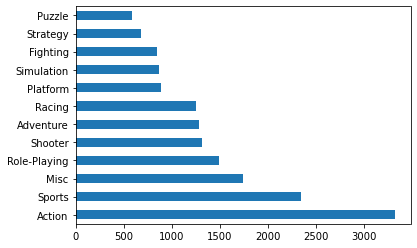

In [151]:
genre.plot.barh();

In [155]:
avg_EU_Global_Sales= df.loc[df["Genre"]=='Sports', 'Global_Sales'].mean()
avg_EU_Global_Sales

0.567318840579705

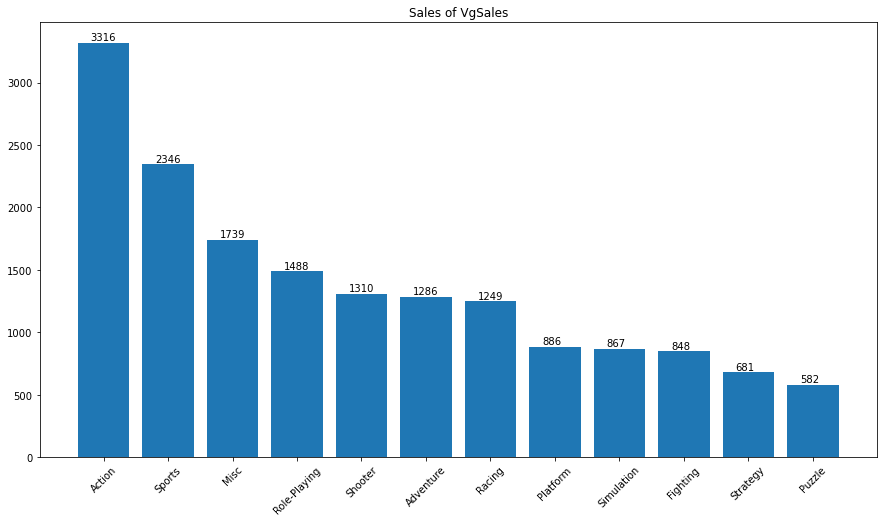

In [44]:
#with matplotlib
fig, ax= plt.subplots(figsize=(15,8))
ax.bar(df.Genre.value_counts().index, df.Genre.value_counts().values)
ax.set_title("Sales of VgSales")
ax.set_xticklabels(genre.index, rotation=45)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.20, p.get_height()+20)); 

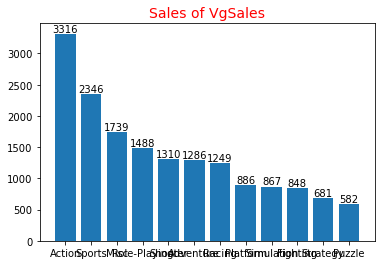

In [49]:
#alternative solution
x= df.Genre.value_counts().index
y=df.Genre.value_counts().values
plt.bar(x, y)
plt.title("Sales of VgSales", fontsize=14, color="red")

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')


In [80]:
publish= df.Publisher.value_counts()[:4]
publish

Electronic Arts       1351
Activision             975
Namco Bandai Games     932
Ubisoft                921
Name: Publisher, dtype: int64

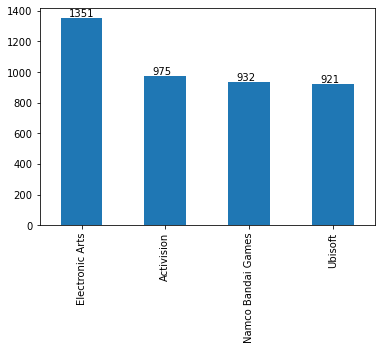

In [81]:
#with pandas
ax= publish.plot.bar()

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.1, p.get_height()+10));

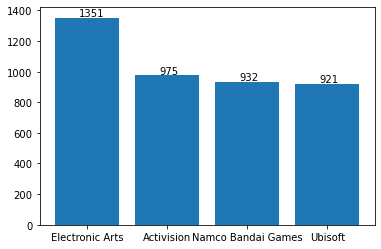

In [89]:
#with matplotlib
fig, ax= plt.subplots()
ax.bar(x=publish.index, height=publish.values)

for p in ax.patches:
    ax.annotate(round(p.get_height()), (p.get_x()+0.3, p.get_height()+10));

In [90]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [91]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [102]:
platform=df.Platform.value_counts().index[:5]
platform

Index(['DS', 'PS2', 'PS3', 'Wii', 'X360'], dtype='object')

In [103]:
platform_values=df.Platform.value_counts().values[:5]
platform_values

array([2163, 2161, 1329, 1325, 1265], dtype=int64)

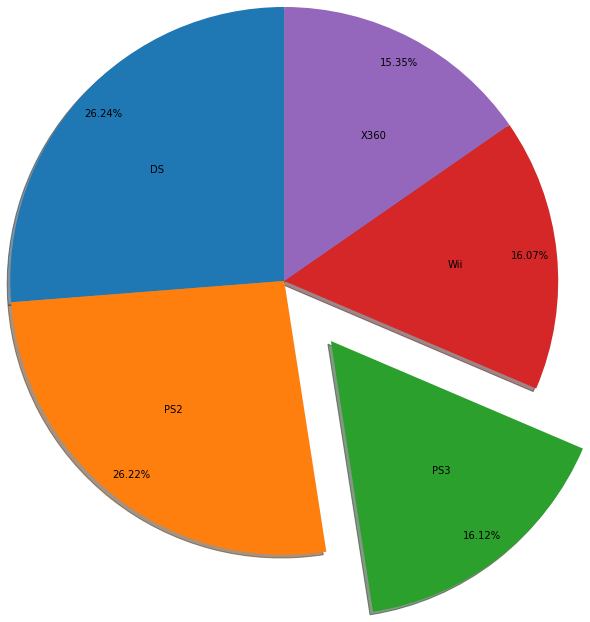

In [118]:
fig1, ax1 = plt.subplots(figsize=(10,7))
ax1.pie(x=platform_values,
    explode=(0, 0, 0.5, 0, 0),
    labels=platform,
    colors=None,
    autopct='%.2f%%',
    pctdistance=0.9,
    shadow=True,
    labeldistance=0.6,
    startangle=90,
    radius=1.8,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False,)
plt.show()

In [121]:
names=df.Name.value_counts()
names

Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
FIFA 14                                     9
Ratatouille                                 9
                                           ..
Aquapazza: Aquaplus Dream Match             1
Trauma Team                                 1
Mario Power Tennis                          1
Tales of the World: Radiant Mythology 3     1
Yes! PreCure 5                              1
Name: Name, Length: 11493, dtype: int64

In [120]:
df[df.Name == 'Yes! PreCure 5']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13481,13483,Yes! PreCure 5,DS,2007.0,Action,Namco Bandai Games,0.0,0.0,0.04,0.0,0.04


In [124]:
most_common_names=Counter(names)
most_common_names

Counter({12: 1,
         9: 4,
         8: 13,
         7: 32,
         6: 88,
         5: 142,
         4: 283,
         3: 710,
         2: 1502,
         1: 8718})